### Bank Products Recommender System

![Bank Recommendation System](../images/santander_logo.png)

This project is based on the Kaggle's competition from 2016 organized by Santander. In this competition, the participants are asked to recommend bank products to clients based on their 1.5 history purchase of products from the bank. For further information, visit [Santander Product Recommendation Competition](https://www.kaggle.com/competitions/santander-product-recommendation/overview).


The features contained in the datset are the following:

- **fecha_dato**: The table is partitioned for this column
- **ncodpers**: Customer code
- **ind_empleado**: Employee index: A active, B ex-employed, F filial, N not employee, P passive
- **pais_residencia**: Customer's country of residence
- **sexo**: Customer's sex
- **age**: Age
- **fecha_alta**: The date in which the customer became the first holder of a contract in the bank
- **ind_nuevo**: New customer index. 1 if the customer registered in the last 6 months.
- **antiguedad**: Customer seniority (in months)
- **indrel**: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
- **ult_fec_cli_1t**: Last date as primary customer (if not at the end of the month)
- **indrel_1mes**: Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4 (former co-owner)
- **tiprel_1mes**: Customer relation type at the beginning of the month: A (active), I (inactive), P (former customer), R (Potential)
- **indresi**: Residence index (S (Yes) or N (No) if the residence country is the same as the bank country)
- **indext**: Foreigner index (S (Yes) or N (No) if the customer's birth country is different from the bank country)
- **conyuemp**: Spouse index. 1 if the customer is the spouse of an employee
- **canal_entrada**: Channel used by the customer to join
- **indfall**: Deceased index. N/S
- **tipodom**: Address type. 1, primary address
- **cod_prov**: Province code (customer's address)
- **nomprov**: Province name
- **ind_actividad_cliente**: Activity index (1, active customer; 0, inactive customer)
- **renta**: Gross income of the household
- **segmento**: Segmentation: 01 - VIP, 02 - Individuals, 03 - College graduates
- **ind_ahor_fin_ult1**: Saving Account
- **ind_aval_fin_ult1**: Guarantees
- **ind_cco_fin_ult1**: Current Accounts
- **ind_cder_fin_ult1**: Derivada Account
- **ind_cno_fin_ult1**: Payroll Account
- **ind_ctju_fin_ult1**: Junior Account
- **ind_ctma_fin_ult1**: Más particular Account
- **ind_ctop_fin_ult1**: Particular Account
- **ind_ctpp_fin_ult1**: Particular Plus Account
- **ind_deco_fin_ult1**: Short-term deposits
- **ind_deme_fin_ult1**: Medium-term deposits
- **ind_dela_fin_ult1**: Long-term deposits
- **ind_ecue_fin_ult1**: E-account
- **ind_fond_fin_ult1**: Funds
- **ind_hip_fin_ult1**: Mortgage
- **ind_plan_fin_ult1**: Pensions
- **ind_pres_fin_ult1**: Loans
- **ind_reca_fin_ult1**: Taxes
- **ind_tjcr_fin_ult1**: Credit Card
- **ind_valo_fin_ult1**: Securities
- **ind_viv_fin_ult1**: Home Account
- **ind_nomina_ult1**: Payroll
- **ind_nom_pens_ult1**: Pensions
- **ind_recibo_ult1**: Direct Debit


### 0 Global Config

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import MultiLabelBinarizer

from recommenders.utils.timer import Timer
#from recommenders.datasets.python_splitters import python_stratified_split
from recommenders.evaluation.python_evaluation import (
    rmse,
    mae,
    rsquared,
    exp_var,
    map
)


In [2]:
COL_FECHA_DATO = "fecha_dato"
COL_NCODPERS = "ncodpers"
COL_IND_EMPLEADO = "ind_empleado"
COL_PAIS_RESIDENCIA = "pais_residencia"
COL_SEXO = "sexo"
COL_AGE = "age"
COL_FECHA_ALTA = "fecha_alta"
COL_IND_NUEVO = "ind_nuevo"
COL_ANTIGUEDAD = "antiguedad"
COL_INDREL = "indrel"
COL_ULT_FEC_CLI_1T = "ult_fec_cli_1t"
COL_INDREL_1MES = "indrel_1mes"
COL_TIPREL_1MES = "tiprel_1mes"
COL_INDRESI = "indresi"
COL_INDEXT = "indext"
COL_CONYUEMP = "conyuemp"
COL_CANAL_ENTRADA = "canal_entrada"
COL_INDFALL = "indfall"
COL_TIPODOM = "tipodom"
COL_COD_PROV = "cod_prov"
COL_NOMPROV = "nomprov"
COL_IND_ACTIVIDAD_CLIENTE = "ind_actividad_cliente"
COL_RENTA = "renta"
COL_SEGMENTO = "segmento"
COL_IND_AHOR_FIN_ULT1 = "ind_ahor_fin_ult1"
COL_IND_AVAL_FIN_ULT1 = "ind_aval_fin_ult1"
COL_IND_CCO_FIN_ULT1 = "ind_cco_fin_ult1"
COL_IND_CDER_FIN_ULT1 = "ind_cder_fin_ult1"
COL_IND_CNO_FIN_ULT1 = "ind_cno_fin_ult1"
COL_IND_CTJU_FIN_ULT1 = "ind_ctju_fin_ult1"
COL_IND_CTMA_FIN_ULT1 = "ind_ctma_fin_ult1"
COL_IND_CTOP_FIN_ULT1 = "ind_ctop_fin_ult1"
COL_IND_CTPP_FIN_ULT1 = "ind_ctpp_fin_ult1"
COL_IND_DECO_FIN_ULT1 = "ind_deco_fin_ult1"
COL_IND_DEME_FIN_ULT1 = "ind_deme_fin_ult1"
COL_IND_DELA_FIN_ULT1 = "ind_dela_fin_ult1"
COL_IND_ECUE_FIN_ULT1 = "ind_ecue_fin_ult1"
COL_IND_FOND_FIN_ULT1 = "ind_fond_fin_ult1"
COL_IND_HIP_FIN_ULT1 = "ind_hip_fin_ult1"
COL_IND_PLAN_FIN_ULT1 = "ind_plan_fin_ult1"
COL_IND_PRES_FIN_ULT1 = "ind_pres_fin_ult1"
COL_IND_RECA_FIN_ULT1 = "ind_reca_fin_ult1"
COL_IND_TJCR_FIN_ULT1 = "ind_tjcr_fin_ult1"
COL_IND_VALO_FIN_ULT1 = "ind_valo_fin_ult1"
COL_IND_VIV_FIN_ULT1 = "ind_viv_fin_ult1"
COL_IND_NOMINA_ULT1 = "ind_nomina_ult1"
COL_IND_NOM_PENS_ULT1 = "ind_nom_pens_ult1"
COL_IND_RECIBO_ULT1 = "ind_recibo_ult1"
COL_FINANCIAL_PRODS = "financial_products"


In [3]:
# Define paths for caching and training data
# CACHE_PATH = '../.cache/'
TRAIN_DATA_PATH = '../data/train_ver2.csv'
TEST_DATA_PATH = '../data/test_ver2.csv'
SUBMISSION_DATA_PATH = '../data/sample_submission.csv'

# Top k items to recommend
TOP_K = 7

# Other data settings
PREDICTION_COL = "prediction"

# Model settings
MAX_LEAF = 64
NUM_OF_TREES = 100
LEARNING_RATE = 0.05
METRIC = "map"

SEED = 42

params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "metric": METRIC,
    "num_leaves": MAX_LEAF,
    "n_estimators": NUM_OF_TREES,
    "boost_from_average": True,
    "n_jobs": -1,
    "learning_rate": LEARNING_RATE,
}

# Configure pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### 01 Read data

In [4]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
submission_sample = pd.read_csv(SUBMISSION_DATA_PATH)

/var/folders/12/3wc31nmn1_z4z1sh66bf0tv80000gn/T/ipykernel_95495/1971907755.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(TRAIN_DATA_PATH)
/var/folders/12/3wc31nmn1_z4z1sh66bf0tv80000gn/T/ipykernel_95495/1971907755.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(TEST_DATA_PATH)


In [48]:
train_data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


### 02 User History Analysis
We're going to explore in depth the history purchase of a few clients to find patterns.

In [53]:
max_col = min(train_data.shape[1], 49)  # Ensure we don't exceed the number of available columns
selected_cols = train_data.iloc[:, [0, 1] + list(range(24, max_col))]
clients_ids_list = [1375586, 1050611, 1050612, 1050613, 1050614, 1050623, 1050609]
user_selected_cols = selected_cols[selected_cols[COL_NCODPERS].isin(clients_ids_list)]


def pivot_client_products_optimized(df):
    # Step 1: Create an empty DataFrame for the final result
    unique_clients = df[COL_NCODPERS].unique()
    unique_dates = df[COL_FECHA_DATO].unique()
    
    result_df = pd.DataFrame(index=unique_clients, columns=unique_dates)
    
    # Step 2: Loop through each product column
    for product in df.columns[2:]:  # Assuming first two columns are 'client_id' and 'date'
        product_df = df[df[product] == 1].pivot(index=COL_NCODPERS, columns=COL_FECHA_DATO, values=product)
        
        # Step 3: Update the result DataFrame with product names, concatenating if necessary
        for client_id in product_df.index:
            for date in product_df.columns:
                if pd.notnull(product_df.at[client_id, date]):
                    if pd.isnull(result_df.at[client_id, date]):
                        result_df.at[client_id, date] = product
                    else:
                        result_df.at[client_id, date] += ' ' + product
    
    # Step 4: Reset the index to have a clean DataFrame
    result_df = result_df.reset_index()
    
    return result_df

df_history_purchases = pivot_client_products_optimized(selected_cols)


In [50]:
df_history_purchase[df_history_purchase['index']==1050686]

,index,2015-01-28,2015-02-28,2015-03-28,2015-04-28,2015-05-28,2015-06-28,2015-07-28,2015-08-28,2015-09-28,2015-10-28,2015-11-28,2015-12-28,2016-01-28,2016-02-28,2016-03-28,2016-04-28,2016-05-28
540201,1050686,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1,ind_cco_fin_ult1


I'm going to view what are the last products aquired by clients on the date 2016-05-28 and make a distribution of them.

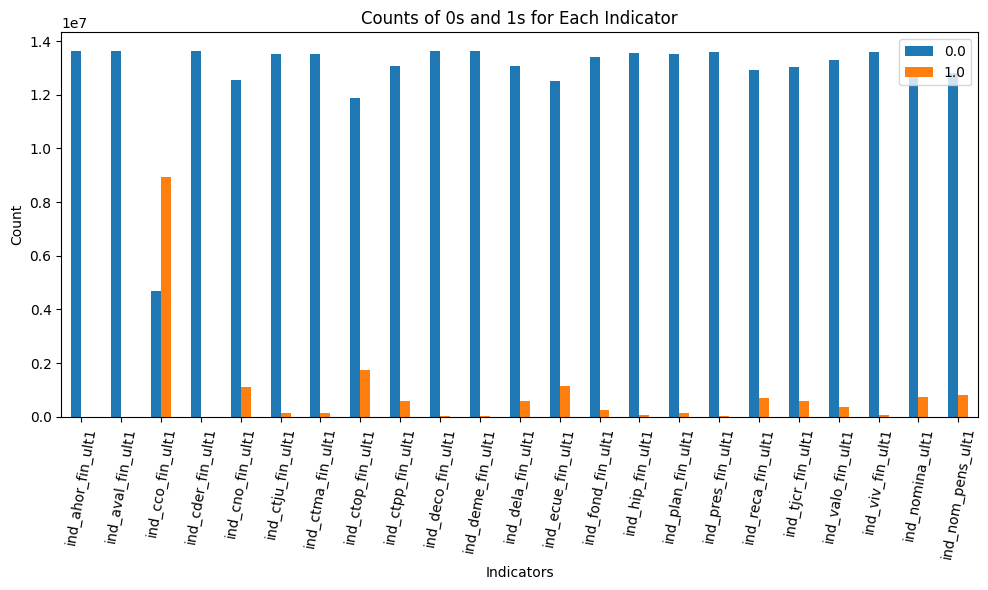

In [18]:
last_product_train_data = train_data[train_data[COL_FECHA_DATO] == "2016-05-28"]

def plot_value_counts(df):
    """
    Plots the count of 0s and 1s for each indicator column in the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame where each row corresponds to a date and columns 
                       correspond to different indicators (ind1, ind2, ind3, etc.).
    """
    df = df.iloc[:, 24:-1]
    
    # Initialize a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Count the occurrences of 0s and 1s for each column
    counts = df.apply(pd.Series.value_counts).T
    
    # Plotting the counts
    counts.plot(kind='bar', ax=ax)
    
    # Adding title and labels
    ax.set_title('Counts of 0s and 1s for Each Indicator')
    ax.set_xlabel('Indicators')
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=80)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_value_counts(train_data)


In [14]:
def count_value_occurrences_as_dataframe(dataframe, field_name):
    """
    Returns a DataFrame with unique values and their counts from the specified field.

    Parameters:
    dataframe (pd.DataFrame): The pandas DataFrame to analyze.
    field_name (str): The name of the column to count unique values for.

    Returns:
    pd.DataFrame: A DataFrame with two columns: 'Value' and 'Count'.
    """
    if field_name in dataframe.columns:
        value_counts = dataframe[field_name].value_counts().reset_index()
        value_counts.columns = [field_name, 'count']
        return value_counts
    else:
        raise KeyError(f"Field '{field_name}' not found in the DataFrame.")


users_history_count = count_value_occurrences_as_dataframe(train_data_transformed, COL_NCODPERS)

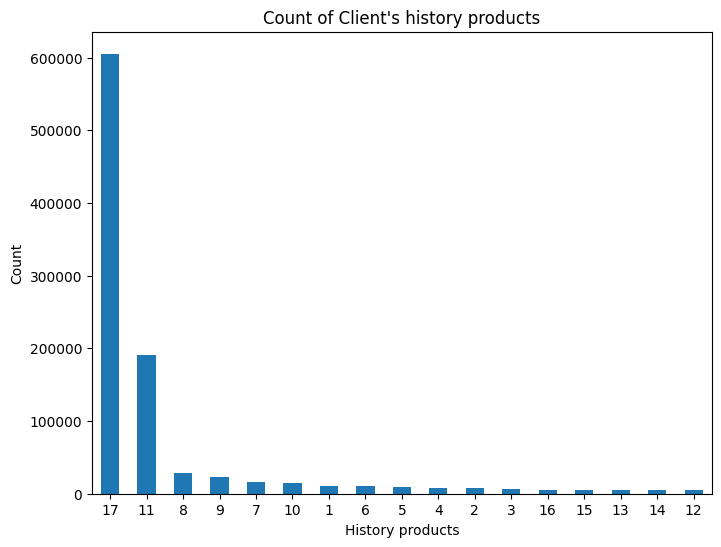

In [15]:
# Count the occurrences of each value in the column
value_counts = users_history_count['count'].sort_values(ascending=True).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Count of Client\'s history products')
plt.xlabel('History products')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [16]:
print("""
Train:
Total Relationships: {train_total}
Unique Users: {train_users}
Unique Items: {train_items}

Test:
Total Relationships: {test_total}
Unique Users: {test_users}
""".format(
    train_total=len(train_data_transformed),
    train_users=len(train_data_transformed[COL_NCODPERS].unique()),
    train_items=len(train_data_transformed[COL_FINANCIAL_PRODS].unique()),
    test_total=len(test_data),
    test_users=len(test_data[COL_NCODPERS].unique()),
))


Train:
Total Relationships: 13647309
Unique Users: 956645
Unique Items: 12198

Test:
Total Relationships: 929615
Unique Users: 929615



### 3 Model Training

I'm going to establish a baseline in order to compare model iterations and check metrics progression.

For this use case, time dependency and order of products purchase matter. That's why it is needed a model capable of taking into account these features while finding similarities between user's interactions.  

First we need to store the values of the items to be able to process in numerical format for the trinaing part and then decode the numerical values to the string format. For this reason, it's necessary to map the values to the codes in first place.

In [17]:
def encode_categorical_to_integers(df, column_name):
    """
    Encodes the categorical values in a specific column of a DataFrame to integers.
    
    Parameters:
    - df: pandas DataFrame
    - column_name: The name of the column containing categorical values to encode
    
    Returns:
    - df: DataFrame with the column encoded to integers
    - mapping: A dictionary mapping the original categorical values to integers
    """
    # Generate a unique integer for each category
    mapping = {category: idx for idx, category in enumerate(df[column_name].unique())}

    
    # Apply the mapping to the column
    df[column_name + '_encoded'] = df[column_name].map(mapping)

    # Reverse mapping to get category-integer
    inv_map = {v: k for k, v in mapping.items()}
    
    return df, inv_map

# Encode the categorical values to integers
train_data_encoded, category_mapping = encode_categorical_to_integers(train_data_transformed, COL_FINANCIAL_PRODS)

In [18]:
train_data_encoded.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,financial_products,financial_products_encoded
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,ind_cco_fin_ult1,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,ind_cco_fin_ult1,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,ind_cco_fin_ult1,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,ind_deco_fin_ult1,1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,ind_cco_fin_ult1,0


In [19]:
def print_truncated_dict(d, limit=5):
    truncated = dict(list(d.items())[:limit])
    if len(d) > limit:
        truncated['...'] = f'and {len(d) - limit} more items'
    print(truncated)

# Example usage
print_truncated_dict(category_mapping, limit=7)


{0: 'ind_cco_fin_ult1', 1: 'ind_deco_fin_ult1', 2: 'ind_cco_fin_ult1 ind_recibo_ult1', 3: 'ind_cco_fin_ult1 ind_ecue_fin_ult1', 4: '', 5: 'ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_recibo_ult1', 6: 'ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_valo_fin_ult1', '...': 'and 12191 more items'}


In [20]:
from scipy.sparse import csr_matrix

train_data_preprocessed = train_data_transformed

# Convert timestamps to a numeric value (e.g., days since the first purchase)
train_data_preprocessed['days_since_first'] = (pd.to_datetime(train_data_preprocessed['fecha_dato'], format="%Y-%m-%d") - pd.to_datetime(train_data_preprocessed['fecha_dato'], format="%Y-%m-%d").min()).dt.days

# Create a weight based on recency
train_data_preprocessed['weight'] = 1 / (1 + train_data_preprocessed['days_since_first'])

# Create the user-item interaction matrix
user_item_matrix = csr_matrix((train_data_preprocessed['weight'], (train_data_preprocessed[COL_NCODPERS], train_data_preprocessed['financial_products_encoded'])))#.T.tocsr()


In [21]:
import implicit

# Initialize the ALS model
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=30)

# Train the model using the user-item interaction matrix
model.fit(user_item_matrix)


/Users/ignacio.ojeda/Documents/MLOps/BankRecSys/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 30/30 [00:44<00:00,  1.50s/it]


In [22]:
# Saving model for evaluation and benchmarking
import pickle

type(model)

with open("../models/ALS_v0.pkl", "wb") as f:
    pickle.dump(model, f)

In [23]:
# Single client prediction decoding
def decode_integers_to_categorical(arr, mapping):
    results = []
    for item in arr:
        x = mapping.get(item)
        results.append(x)
    return results

# # Batch client prediction decoding
# def decode_integers_to_categorical_batch(arr, mapping):
#     arr_results = []
#     results = []
#     for array in arr:
#         for item in array:
#             x = mapping.get(item)
#             arr_results.append(x)
#             print(x)
#             print(arr_results)
#             break
#         break
#     results.append(arr_results)
#     print(results)
#     return results
def decode_integers_to_categorical_batch(arr, mapping):
    return [[mapping.get(item) for item in array] for array in arr]

    

In [24]:
print(user_item_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1384917 stored elements and shape (1553690, 12198)>
  Coords	Values
  (15889, 690)	0.07933427304835029
  (15889, 740)	1.0304560366675923
  (15890, 1957)	1.1097903097159425
  (15891, 0)	0.005494505494505495
  (15891, 4)	0.004694835680751174
  (15892, 508)	0.010189341175256668
  (15892, 2388)	1.0671701404655949
  (15892, 4765)	0.03243082807509133
  (15893, 80)	0.07854030971594302
  (15893, 1929)	1.03125
  (15894, 606)	0.024231512175750543
  (15894, 2149)	1.0
  (15894, 5116)	0.05430879754019249
  (15894, 6155)	0.03125
  (15895, 2845)	0.018103885014436223
  (15895, 3570)	0.024516284235911776
  (15895, 4737)	1.067170140465595
  (15896, 0)	0.01505852748979222
  (15896, 475)	0.015721519897575392
  (15896, 532)	0.00273224043715847
  (15896, 1076)	0.0025188916876574307
  (15896, 1348)	0.006588989738164488
  (15897, 4738)	1.0755379500640359
  (15897, 8230)	0.02766336991374249
  (15897, 11883)	0.006588989738164488
  :	:
  (1553660, 4)	

In [25]:
# Recommendations for single client
client_id = 15891
recommendations = model.recommend(client_id, user_item_matrix[client_id], N=TOP_K)[0]
print(recommendations)
decoded_recommendations = decode_integers_to_categorical(recommendations, category_mapping)

print(f"Top {TOP_K} recommended products:", decoded_recommendations)



[ 95   1 671 111  11   7  51]
Top 7 recommended products: ['ind_cco_fin_ult1 ind_deco_fin_ult1', 'ind_deco_fin_ult1', 'ind_cno_fin_ult1 ind_ctpp_fin_ult1 ind_nomina_ult1 ind_nom_pens_ult1 ind_recibo_ult1', 'ind_fond_fin_ult1', 'ind_cno_fin_ult1 ind_ecue_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_nomina_ult1 ind_nom_pens_ult1 ind_recibo_ult1', 'ind_cno_fin_ult1 ind_ecue_fin_ult1 ind_recibo_ult1', 'ind_cno_fin_ult1 ind_reca_fin_ult1 ind_nomina_ult1 ind_nom_pens_ult1 ind_recibo_ult1']


In [26]:
# Batch recommendations
userids = np.arange(len(test_data[COL_NCODPERS].unique()))
ids, scores = model.recommend(userids, user_item_matrix[userids], N=TOP_K)
ids, ids.shape

(array([[  6,   5,   4, ...,   2,   1,   0],
        [  6,   5,   4, ...,   2,   1,   0],
        [  6,   5,   4, ...,   2,   1,   0],
        ...,
        [ 95,   1,  53, ..., 111,  69, 318],
        [  1,  95, 671, ...,  11,  24,  51],
        [ 95,   1,  53, ..., 111,  69, 318]], dtype=int32),
 (929615, 7))

In [27]:
decoded_recommendations = decode_integers_to_categorical_batch(ids, category_mapping)

In [42]:
# Submission results
type(decoded_recommendations)
decoded_recommendations[0]

col_clients_ids = test_data[COL_NCODPERS].unique()

# Flatten the nested list
flattened_list = [item[0] for item in decoded_recommendations]

# Ensure the length matches
if len(flattened_list) == len(col_clients_ids):
    # Create a new DataFrame
    df_submission = pd.DataFrame({
        'ncodpers': col_clients_ids,
        'added_products': flattened_list
    })
else:
    print("The flattened list does not match the length of the DataFrame.")
    print(len(flattened_list))
    print(len(col_clients_ids))

df_submission.sort_values(by='ncodpers', ascending=True)
df_submission.head()

,ncodpers,added_products
0,15889,ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_valo_fi...
1,1170544,ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_valo_fi...
2,1170545,ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_valo_fi...
3,1170547,ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_valo_fi...
4,1170548,ind_cco_fin_ult1 ind_ecue_fin_ult1 ind_valo_fi...


In [43]:
df_submission.to_csv('../submissions/submission_0.csv', index=False)
